In [ ]:
# Este comando descarga el archivo desde el portal del gobierno y lo guarda en Colab
# con el nombre m√°s corto 'datos-uni-agosto-25.csv'
!wget https://datosabiertos.gob.pe/sites/default/files/Datos_abiertos_admision_2021_1_2024_1.csv -O datos-uni-agosto-25.csv

--2025-08-05 15:42:41--  https://datosabiertos.gob.pe/sites/default/files/Datos_abiertos_admision_2021_1_2024_1.csv
Resolving datosabiertos.gob.pe (datosabiertos.gob.pe)... 119.8.199.203
Connecting to datosabiertos.gob.pe (datosabiertos.gob.pe)|119.8.199.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13218729 (13M) [application/octet-stream]
Saving to: ‚Äòdatos-uni-agosto-25.csv‚Äô

datos-uni-agosto-25 100%[===================>]  12.61M  8.62MB/s    in 1.5s    

2025-08-05 15:42:44 (8.62 MB/s) - ‚Äòdatos-uni-agosto-25.csv‚Äô saved [13218729/13218729]



In [ ]:
# Importar las librer√≠as necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV en un DataFrame de pandas
# ¬°OJO! Usa el nuevo nombre corto que le diste al archivo
df = pd.read_csv('datos-uni-agosto-25.csv')

In [ ]:
# Muestra las primeras 5 filas de tu tabla de datos
print(df.head())

# Muestra los nombres de todas las columnas (muy importante para hacer los gr√°ficos)
print("\nNombres de las columnas:")
print(df.columns)

                                              IDHASH  \
0  E4287C2FE19F63C5E6641955147E36684A5A2FF8064676...   
1  2DC37F0B9727B6591EC72D7A942647797A200F45D47C9E...   
2  3B8677B90781D7BB8F2F967C05FA2DBBE153BBB682DF05...   
3  FA366704D9E9F6FB5E5F55C1FB0CEEE973C626A5616F55...   
4  E31CF8F30F3AE60B3D8A14F6E1020E9AD26EE975F0823B...   

                      COLEGIO COLEGIO_DEPA COLEGIO_PROV  \
0       LA DIVINA PROVIDENCIA         LIMA         LIMA   
1           86019 LA LIBERTAD       √ÅNCASH       HUARAZ   
2  0113 DANIEL ALOMIAS ROBLES         LIMA         LIMA   
3     SEBASTIAN SALAZAR BONDY         LIMA         LIMA   
4           TRILCE LOS OLIVOS         LIMA         LIMA   

             COLEGIO_DIST COLEGIO_PAIS  COLEGIO_ANIO_EGRESO  \
0               SURQUILLO         PER√ö                 2020   
1                  HUARAZ         PER√ö                 2017   
2  SAN JUAN DE LURIGANCHO         PER√ö                 2016   
3             SANTA ANITA         PER√ö             

In [ ]:
# --- Carga inicial y librer√≠as (si no lo has hecho ya) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga tus datos (aseg√∫rate de que el nombre del archivo es correcto)
df = pd.read_csv('datos-uni-agosto-25.csv')

# --- 1. Crear la columna 'ZONA' ---
# ¬°MUY IMPORTANTE! Esta es una simplificaci√≥n solo para el ejemplo.
# Aqu√≠ asumimos que ciertos departamentos son predominantemente rurales.
# T√∫ deber√≠as usar un criterio m√°s preciso si lo tienes (por ejemplo, basado en el distrito).

# Lista de departamentos que consideraremos "Rurales" para este ejemplo
# Cambia o agrega departamentos seg√∫n tu conocimiento
departamentos_rurales = ['HUANCAVELICA', 'CAJAMARCA', 'APURIMAC', 'AYACUCHO', 'PUNO', 'AMAZONAS', 'PASCO']

# Creamos la columna 'ZONA'. Si el departamento est√° en la lista, es 'Rural', si no, 'Urbana'.
# Aseg√∫rate de usar el nombre correcto de tu columna de departamento, ej: 'DOMICILIO_DEPA'
df['ZONA'] = df['DOMICILIO_DEPA'].apply(lambda depto: 'Rural' if depto in departamentos_rurales else 'Urbana')

# --- 2. Crear la columna 'EstadoIngreso' ---
# Esto hace que la leyenda del gr√°fico sea m√°s clara.
# Usaremos la columna 'INGRESO'. Revisa qu√© valores tiene (p. ej., 'INGRESO', 'NO INGRESO', etc.)
# Aqu√≠ asumimos que dice 'INGRESO' para los que entraron.
# La funci√≥n .map es una forma elegante de hacer esto.
mapeo_ingreso = {'INGRESO': 'Ingres√≥', 'NO LOGRO ALCANZAR VACANTE': 'No Ingres√≥'}

# Usamos .fillna() por si hay valores nulos y luego .map para cambiar los nombres
df['EstadoIngreso'] = df['INGRESO'].fillna('No Ingres√≥').map(mapeo_ingreso).fillna('No Ingres√≥')


# --- Verificaci√≥n (opcional pero recomendado) ---
print("Conteo de postulantes por zona creada:")
print(df['ZONA'].value_counts())

print("\nConteo de postulantes por estado de ingreso creado:")
print(df['EstadoIngreso'].value_counts())

Conteo de postulantes por zona creada:
ZONA
Urbana    40480
Rural      2036
Name: count, dtype: int64

Conteo de postulantes por estado de ingreso creado:
EstadoIngreso
No Ingres√≥    42516
Name: count, dtype: int64


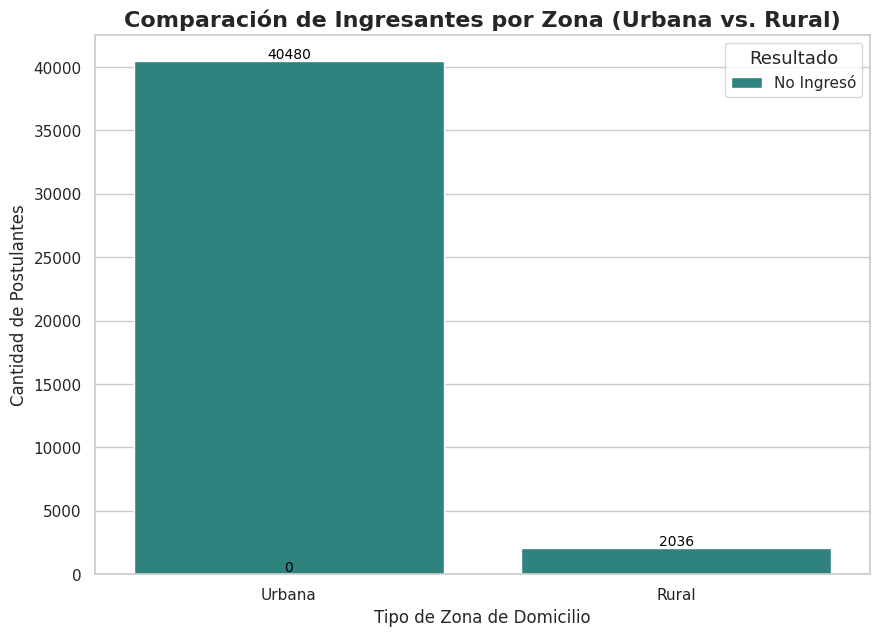

In [ ]:
# --- Configuraci√≥n del estilo y tama√±o del gr√°fico ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7)) # Tama√±o adecuado para la visualizaci√≥n

# --- Creaci√≥n del gr√°fico ---
# Usamos un 'palette' para elegir una combinaci√≥n de colores bonita. 'viridis', 'Paired', 'Set2' son buenas opciones.
ax = sns.countplot(data=df, x='ZONA', hue='EstadoIngreso', palette='viridis')

# --- A√±adir T√≠tulos y Etiquetas para que sea claro ---
plt.title('Comparaci√≥n de Ingresantes por Zona (Urbana vs. Rural)', fontsize=16, weight='bold')
plt.xlabel('Tipo de Zona de Domicilio', fontsize=12)
plt.ylabel('Cantidad de Postulantes', fontsize=12)
plt.legend(title='Resultado', title_fontsize='13', fontsize='11')

# --- (Opcional) A√±adir el n√∫mero exacto encima de cada barra ---
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# --- Mostrar el gr√°fico ---
plt.show()

In [ ]:
# --- Carga inicial y librer√≠as (si no lo has hecho ya) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga tus datos
df = pd.read_csv('datos-uni-agosto-25.csv')

# --- Preparaci√≥n de columnas auxiliares ---

# 1. Crear la columna 'ZONA' (ajusta la lista de departamentos seg√∫n tu criterio)
departamentos_rurales = ['HUANCAVELICA', 'CAJAMARCA', 'APURIMAC', 'AYACUCHO', 'PUNO', 'AMAZONAS', 'PASCO']
df['ZONA'] = df['DOMICILIO_DEPA'].apply(lambda depto: 'Rural' if depto in departamentos_rurales else 'Urbana')

# 2. Crear la columna 'EstadoIngreso' para mayor claridad
mapeo_ingreso = {'INGRESO': 'Ingres√≥', 'NO LOGRO ALCANZAR VACANTE': 'No Ingres√≥'}
df['EstadoIngreso'] = df['INGRESO'].fillna('No Ingres√≥').map(mapeo_ingreso).fillna('No Ingres√≥')

# --- FILTRADO CLAVE: Seleccionar solo a las mujeres ---
# Aseg√∫rate de que el valor sea 'FEMENINO'. Puedes verificarlo con df['SEXO'].unique()
# Creamos un nuevo DataFrame solo con los datos de las mujeres
df_mujeres = df[df['SEXO'] == 'FEMENINO'].copy()

# Verificaci√≥n (opcional pero muy √∫til)
print(f"N√∫mero total de postulantes: {len(df)}")
print(f"N√∫mero de mujeres postulantes: {len(df_mujeres)}")
print("\nDesglose de mujeres por zona y estado de ingreso:")
print(df_mujeres.groupby(['ZONA', 'EstadoIngreso']).size())

N√∫mero total de postulantes: 42516
N√∫mero de mujeres postulantes: 10097

Desglose de mujeres por zona y estado de ingreso:
ZONA    EstadoIngreso
Rural   No Ingres√≥        461
Urbana  No Ingres√≥       9636
dtype: int64


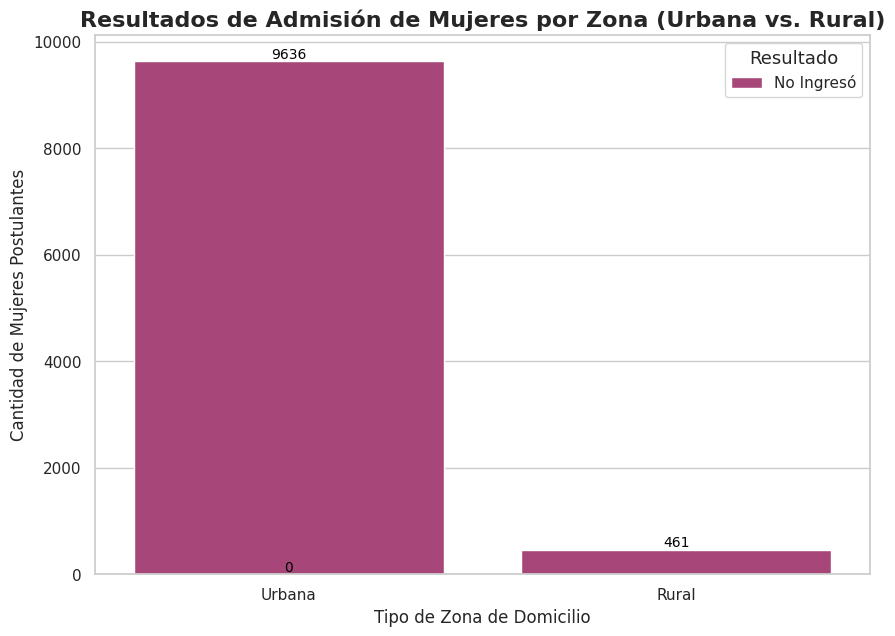

In [ ]:
# --- Configuraci√≥n del estilo y tama√±o del gr√°fico ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7))

# --- Creaci√≥n del gr√°fico usando el DataFrame filtrado 'df_mujeres' ---
# Usamos una paleta de colores que se asocie bien, como 'magma' o 'plasma'
ax = sns.countplot(data=df_mujeres, x='ZONA', hue='EstadoIngreso', palette='magma')

# --- T√≠tulos y Etiquetas claras para el contexto ---
plt.title('Resultados de Admisi√≥n de Mujeres por Zona (Urbana vs. Rural)', fontsize=16, weight='bold')
plt.xlabel('Tipo de Zona de Domicilio', fontsize=12)
plt.ylabel('Cantidad de Mujeres Postulantes', fontsize=12)
plt.legend(title='Resultado', title_fontsize='13', fontsize='11') # Cambiamos el t√≠tulo de la leyenda

# --- (Opcional) A√±adir el n√∫mero exacto encima de cada barra ---
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# --- Mostrar el gr√°fico final ---
plt.show()

In [ ]:

!wget "https://datosabiertos.gob.pe/sites/default/files/Docentes2024_0.csv" -O data_docente.CSV

--2025-08-05 16:24:56--  https://datosabiertos.gob.pe/sites/default/files/Docentes2024_0.csv
Resolving datosabiertos.gob.pe (datosabiertos.gob.pe)... 119.8.199.203
Connecting to datosabiertos.gob.pe (datosabiertos.gob.pe)|119.8.199.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13456217 (13M) [application/octet-stream]
Saving to: ‚Äòdata_docente.CSV‚Äô

data_docente.CSV    100%[===================>]  12.83M  5.26MB/s    in 2.4s    

2025-08-05 16:25:00 (5.26 MB/s) - ‚Äòdata_docente.CSV‚Äô saved [13456217/13456217]



In [ ]:

!wget "https://datosabiertos.gob.pe/sites/default/files/Docentes2024_0.csv" -O data_docente.CSV

--2025-08-05 20:45:38--  https://datosabiertos.gob.pe/sites/default/files/Docentes2024_0.csv
Resolving datosabiertos.gob.pe (datosabiertos.gob.pe)... 119.8.199.203
Connecting to datosabiertos.gob.pe (datosabiertos.gob.pe)|119.8.199.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13456217 (13M) [application/octet-stream]
Saving to: ‚Äòdata_docente.CSV‚Äô

data_docente.CSV    100%[===================>]  12.83M  10.4MB/s    in 1.2s    

2025-08-05 20:45:40 (10.4 MB/s) - ‚Äòdata_docente.CSV‚Äô saved [13456217/13456217]



In [ ]:
# Importar las librer√≠as necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV en un DataFrame de pandas
# ¬°OJO! Usa el nuevo nombre corto que le diste al archivo
df = pd.read_csv('data_docente.CSV')

In [ ]:
df.columns

Index(['cod_mod', 'anexo', 'codlocal', 'cen_edu', 'dir_cen', 'niv_mod',
       'nivel', 'nivel2', 'nivel3', 'ges_dep', 'gestion', 'codgeo', 'codooii',
       'area_censo', 'area', 'region', 'dpto', 'prov', 'dist', 'dre_ugel',
       'region_e', 'Docentes_hombres', 'Docentes_mujeres',
       'Docentes_nombrados', 'Docentes_contratados', 'Docentes_25_menos_a√±os',
       'Docentes_2635_a√±os', 'Docentes_3645_a√±os', 'Docentes_4655_a√±os',
       'Docentes_5665_a√±os', 'Docentes_66_a_mas_a√±os', 'Docentes_con_titulo',
       'Docentes_sin_titulo', 'Docentes_total'],
      dtype='object')

¬øD√≥nde se concentran los docentes y cu√°l es la composici√≥n de g√©nero por departamento?

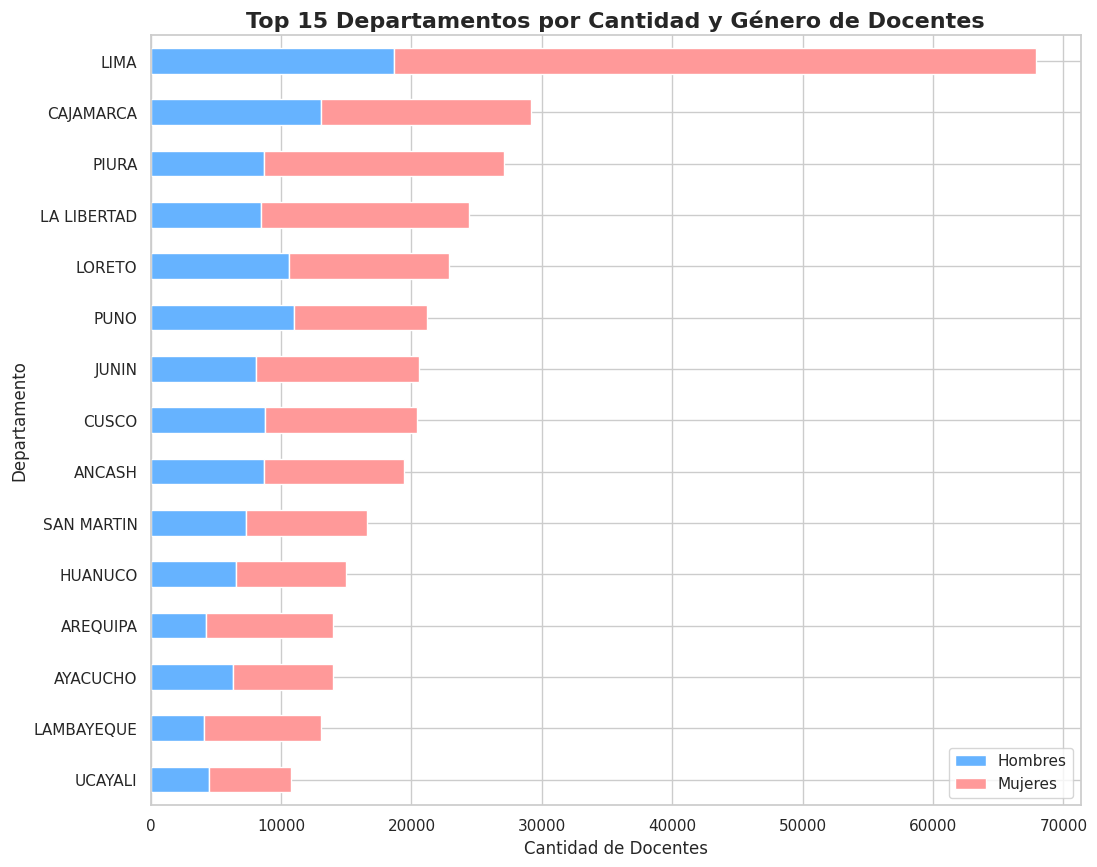

In [ ]:
# --- Preparaci√≥n de Datos ---
# Agrupamos por departamento y sumamos las columnas relevantes
docentes_por_dpto = df.groupby('dpto')[['Docentes_hombres', 'Docentes_mujeres', 'Docentes_total']].sum()

# Ordenamos por el total para quedarnos con los 15 m√°s grandes
top_15_dptos = docentes_por_dpto.sort_values('Docentes_total', ascending=False).head(15)

# --- Creaci√≥n del Gr√°fico ---
# Usamos un gr√°fico de barras apiladas (stacked)
ax = top_15_dptos[['Docentes_hombres', 'Docentes_mujeres']].plot(
    kind='barh',  # Horizontal para leer mejor los nombres
    stacked=True,
    figsize=(12, 10),
    color=['#66b3ff', '#ff9999'] # Colores para hombres y mujeres
)

# --- T√≠tulos y Etiquetas ---
plt.title('Top 15 Departamentos por Cantidad y G√©nero de Docentes', fontsize=16, weight='bold')
plt.xlabel('Cantidad de Docentes', fontsize=12)
plt.ylabel('Departamento', fontsize=12)
plt.legend(['Hombres', 'Mujeres'])
plt.gca().invert_yaxis() # Pone el m√°s grande arriba
plt.show()

Gr√°fico 2: ¬øC√≥mo var√≠a la proporci√≥n de g√©nero entre zonas urbanas y rurales?

Datos que se usar√°n para el gr√°fico:
            Docentes_hombres  Docentes_mujeres
area_censo                                    
1                      75195            157067
2                      80465             92297
------------------------------


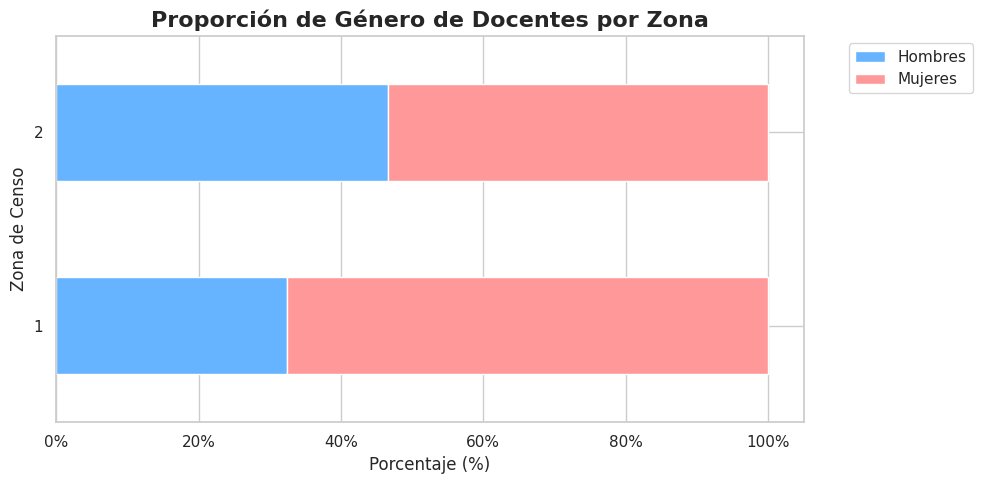

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Carga y preparaci√≥n (aseg√∫rate de haber ejecutado esto) ---
df = pd.read_csv('data_docente.CSV')

# --- Preparaci√≥n de Datos ---
# Agrupamos por zona (urbana/rural) y sumamos los docentes por g√©nero
genero_por_zona = df.groupby('area_censo')[['Docentes_hombres', 'Docentes_mujeres']].sum()

# --- IMPRIMIR PARA VERIFICAR ---
# Esta l√≠nea te mostrar√° exactamente qu√© fila corresponde a qu√© etiqueta (URBANO/RURAL)
print("Datos que se usar√°n para el gr√°fico:")
print(genero_por_zona)
print("-" * 30)

# Calculamos el porcentaje para poder comparar proporciones
genero_por_zona_pct = genero_por_zona.div(genero_por_zona.sum(axis=1), axis=0)

# --- Creaci√≥n del Gr√°fico ---
ax = genero_por_zona_pct.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 5),
    color=['#66b3ff', '#ff9999']
)

# --- T√≠tulos y Etiquetas MEJORADAS ---
plt.title('Proporci√≥n de G√©nero de Docentes por Zona', fontsize=16, weight='bold')
plt.xlabel('Porcentaje (%)', fontsize=12)
plt.ylabel('Zona de Censo', fontsize=12) # Etiqueta m√°s clara
ax.legend(['Hombres', 'Mujeres'], bbox_to_anchor=(1.05, 1), loc='upper left')
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

# Las etiquetas del eje Y ahora usar√°n directamente los nombres 'URBANO' y 'RURAL'
# por lo que no habr√° confusi√≥n.
plt.tight_layout()
plt.show()

An√°lisis de G√©nero, Edad y Tipo de Contrato

/tmp/ipython-input-3133868098.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=total_por_edad.index, y=total_por_edad.values, palette='plasma')
/tmp/ipython-input-3133868098.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x=total_contratos.index, y=total_contratos.values, palette='coolwarm')
/tmp/ipython-input-3133868098.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['Nombrados', 'Contratados'])


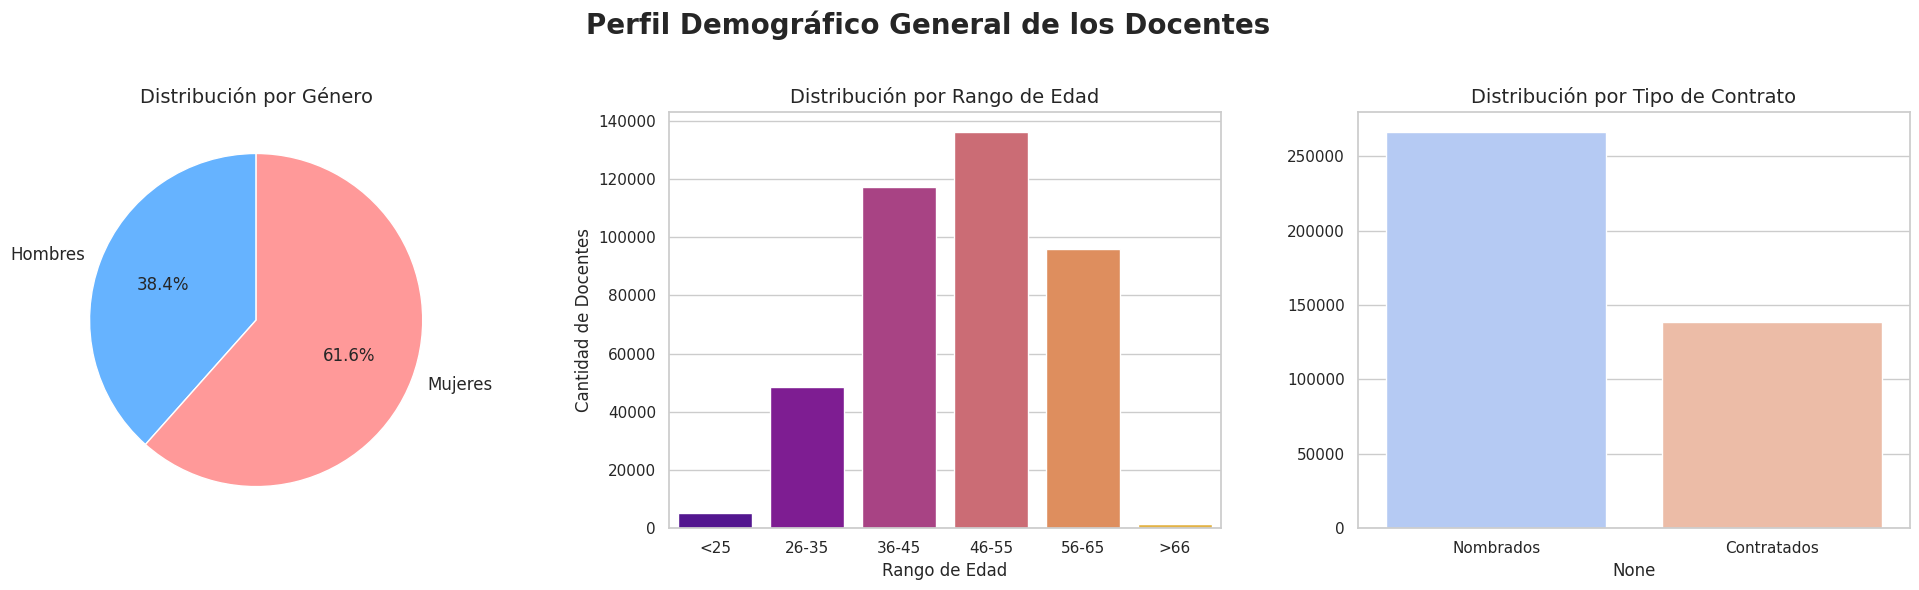

In [ ]:
# --- Creaci√≥n de una figura con m√∫ltiples sub-gr√°ficos ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Perfil Demogr√°fico General de los Docentes', fontsize=20, weight='bold')

# --- Gr√°fico A: Distribuci√≥n por G√©nero ---
total_genero = df[['Docentes_hombres', 'Docentes_mujeres']].sum()
axes[0].pie(total_genero, labels=['Hombres', 'Mujeres'], autopct='%1.1f%%',
            startangle=90, colors=['#66b3ff','#ff9999'], textprops={'fontsize': 12})
axes[0].set_title('Distribuci√≥n por G√©nero', fontsize=14)

# --- Gr√°fico B: Distribuci√≥n por Edad ---
columnas_edad = [
    'Docentes_25_menos_a√±os', 'Docentes_2635_a√±os', 'Docentes_3645_a√±os',
    'Docentes_4655_a√±os', 'Docentes_5665_a√±os', 'Docentes_66_a_mas_a√±os'
]
total_por_edad = df[columnas_edad].sum()
total_por_edad.index = ['<25', '26-35', '36-45', '46-55', '56-65', '>66']
sns.barplot(ax=axes[1], x=total_por_edad.index, y=total_por_edad.values, palette='plasma')
axes[1].set_title('Distribuci√≥n por Rango de Edad', fontsize=14)
axes[1].set_xlabel('Rango de Edad')
axes[1].set_ylabel('Cantidad de Docentes')

# --- Gr√°fico C: Distribuci√≥n por Tipo de Contrato ---
total_contratos = df[['Docentes_nombrados', 'Docentes_contratados']].sum()
sns.barplot(ax=axes[2], x=total_contratos.index, y=total_contratos.values, palette='coolwarm')
axes[2].set_title('Distribuci√≥n por Tipo de Contrato', fontsize=14)
axes[2].set_xticklabels(['Nombrados', 'Contratados'])
axes[2].set_ylabel('') # No es necesario repetir la etiqueta del eje y

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustar para el t√≠tulo principal
plt.show()

In [ ]:
# Este comando descarga el archivo desde el portal del gobierno y lo guarda en Colab
# con el nombre m√°s corto 'datos-uni-agosto-25.csv'
!wget https://datosabiertos.gob.pe/sites/default/files/Datos_abiertos_admision_2021_1_2024_1.csv -O datos-uni-agosto-25.csv

--2025-08-05 20:31:37--  https://datosabiertos.gob.pe/sites/default/files/Datos_abiertos_admision_2021_1_2024_1.csv
Resolving datosabiertos.gob.pe (datosabiertos.gob.pe)... 119.8.199.203
Connecting to datosabiertos.gob.pe (datosabiertos.gob.pe)|119.8.199.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13218729 (13M) [application/octet-stream]
Saving to: ‚Äòdatos-uni-agosto-25.csv‚Äô

datos-uni-agosto-25 100%[===================>]  12.61M   236KB/s    in 27s     

2025-08-05 20:32:05 (480 KB/s) - ‚Äòdatos-uni-agosto-25.csv‚Äô saved [13218729/13218729]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

# ==============================================================================
# 2. DEFINIR NOMBRE DEL ARCHIVO Y VERIFICAR SU EXISTENCIA
# ==============================================================================
# ¬°Importante! Aseg√∫rate de que este nombre coincida con tu archivo.
# La √∫ltima vez, el archivo ten√≠a la extensi√≥n en may√∫sculas: .CSV
nombre_del_archivo = 'data_docente.CSV'


In [ ]:
# ==============================================================================
# 1. IMPORTAR LIBRER√çAS
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# 2. CARGAR EL ARCHIVO DE DATOS DE ADMISI√ìN
# ==============================================================================
# Nombre del archivo que descargaste con !wget
nombre_del_archivo = 'datos-uni-agosto-25.csv'

try:
    df = pd.read_csv(nombre_del_archivo)
    print(f"‚úÖ Archivo '{nombre_del_archivo}' cargado exitosamente en el DataFrame 'df'.")
except Exception as e:
    print(f"‚ùå Ocurri√≥ un error al leer el archivo: {e}")

# ==============================================================================
# 3. PREPARAR COLUMNAS AUXILIARES (¬°MUY IMPORTANTE!)
# ==============================================================================
# Estas columnas nos facilitar√°n la creaci√≥n de los gr√°ficos.

# --- Crear la columna 'ZONA' ---
# Asumimos que ciertos departamentos son predominantemente rurales.
# ¬°Puedes ajustar esta lista seg√∫n tu criterio!
departamentos_rurales = ['HUANCAVELICA', 'CAJAMARCA', 'APURIMAC', 'AYACUCHO', 'PUNO', 'AMAZONAS', 'PASCO']

# Usamos la columna 'DOMICILIO_DEPA' para crear la nueva columna 'ZONA'.
df['ZONA'] = df['DOMICILIO_DEPA'].apply(lambda depto: 'Rural' if depto in departamentos_rurales else 'Urbana')

# --- Crear la columna 'EstadoIngreso' para etiquetas claras ---
# Esto convierte los valores de la columna 'INGRESO' en etiquetas m√°s legibles.
mapeo_ingreso = {'INGRESO': 'Ingres√≥', 'NO LOGRO ALCANZAR VACANTE': 'No Ingres√≥'}
df['EstadoIngreso'] = df['INGRESO'].fillna('No Ingres√≥').map(mapeo_ingreso).fillna('No Ingres√≥')

# ==============================================================================
# 4. VERIFICACI√ìN INICIAL
# ==============================================================================
print("\n--- Primeras 5 filas de los datos preparados: ---")
print(df.head())
print("\n--- Columnas disponibles: ---")
print(df.columns)
print("\nüöÄ ¬°Todo listo! Ya puedes ejecutar las celdas de los gr√°ficos.")

‚úÖ Archivo 'datos-uni-agosto-25.csv' cargado exitosamente en el DataFrame 'df'.

--- Primeras 5 filas de los datos preparados: ---
                                              IDHASH  \
0  E4287C2FE19F63C5E6641955147E36684A5A2FF8064676...   
1  2DC37F0B9727B6591EC72D7A942647797A200F45D47C9E...   
2  3B8677B90781D7BB8F2F967C05FA2DBBE153BBB682DF05...   
3  FA366704D9E9F6FB5E5F55C1FB0CEEE973C626A5616F55...   
4  E31CF8F30F3AE60B3D8A14F6E1020E9AD26EE975F0823B...   

                      COLEGIO COLEGIO_DEPA COLEGIO_PROV  \
0       LA DIVINA PROVIDENCIA         LIMA         LIMA   
1           86019 LA LIBERTAD       √ÅNCASH       HUARAZ   
2  0113 DANIEL ALOMIAS ROBLES         LIMA         LIMA   
3     SEBASTIAN SALAZAR BONDY         LIMA         LIMA   
4           TRILCE LOS OLIVOS         LIMA         LIMA   

             COLEGIO_DIST COLEGIO_PAIS  COLEGIO_ANIO_EGRESO  \
0               SURQUILLO         PER√ö                 2020   
1                  HUARAZ         PER√ö         

Generando Gr√°fico 1: Postulantes por Departamento...


/tmp/ipython-input-370364038.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


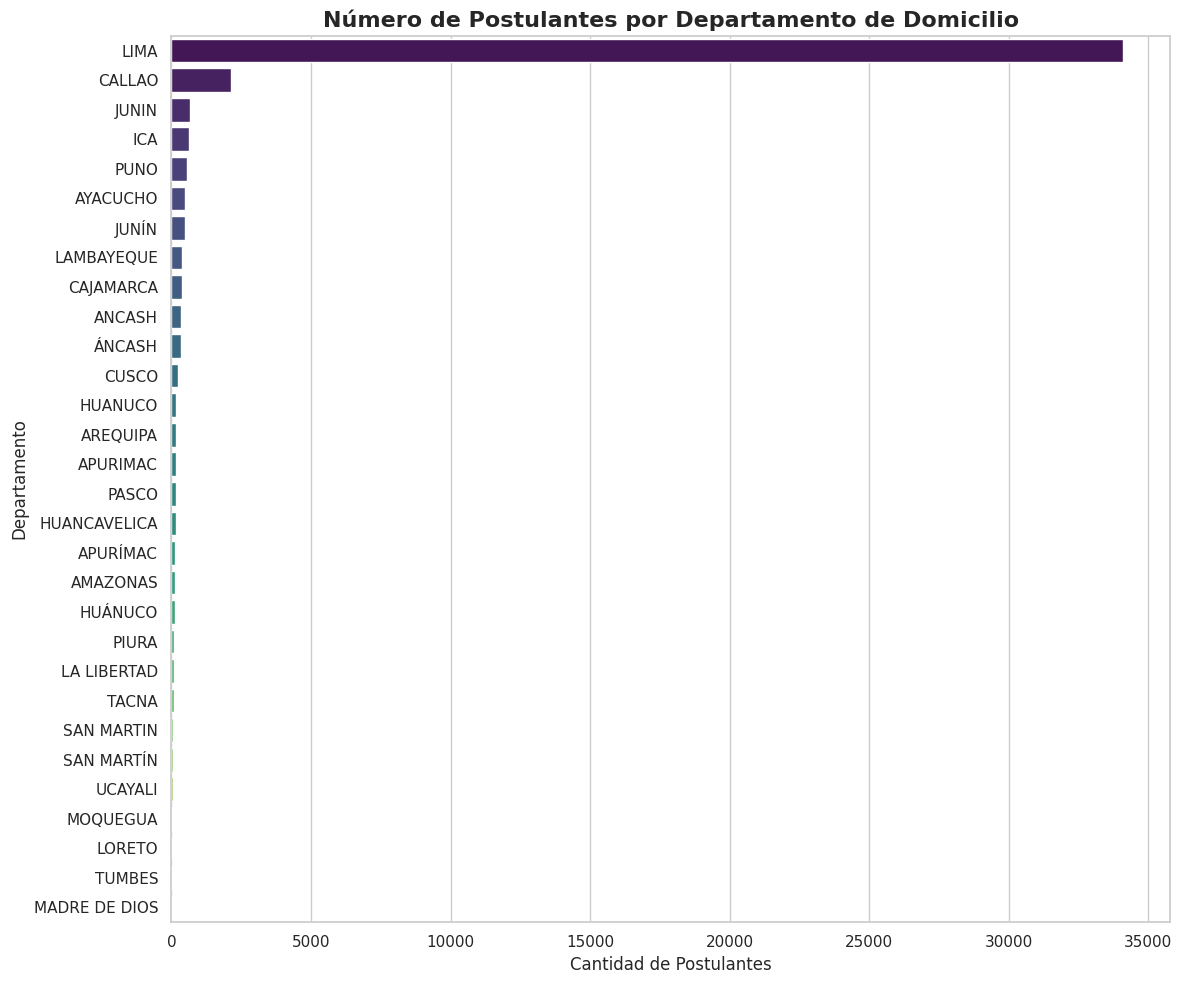

In [ ]:
print("Generando Gr√°fico 1: Postulantes por Departamento...")

plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

# sns.countplot es perfecto para contar las ocurrencias en una columna.
# Usamos 'y' para hacerlo horizontal y que los nombres se lean mejor.
sns.countplot(
    data=df,
    y='DOMICILIO_DEPA',
    order=df['DOMICILIO_DEPA'].value_counts().index, # Ordenar de mayor a menor
    palette='viridis'
)

plt.title('N√∫mero de Postulantes por Departamento de Domicilio', fontsize=16, weight='bold')
plt.xlabel('Cantidad de Postulantes', fontsize=12)
plt.ylabel('Departamento', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# ==============================================================================
# 1. IMPORTAR LIBRER√çAS
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

# ==============================================================================
# 2. DEFINIR NOMBRE DEL ARCHIVO Y VERIFICAR SU EXISTENCIA
# ==============================================================================
# ¬°Importante! Este es el nombre del archivo de DOCENTES.
# Recuerda que la extensi√≥n estaba en may√∫sculas: .CSV
nombre_del_archivo = 'data_docente.CSV'

# Si el archivo no est√° en el entorno de Colab, se pedir√° que lo subas.
if not os.path.exists(nombre_del_archivo):
    print(f"‚ö†Ô∏è El archivo '{nombre_del_archivo}' no se encontr√≥.")
    print("Por favor, s√∫belo desde tu computadora.")
    uploaded = files.upload()
    if nombre_del_archivo in uploaded:
        print(f"\n‚úÖ Archivo '{nombre_del_archivo}' subido exitosamente.")
    else:
        print(f"\n‚ùå Error: El archivo subido no coincide con el nombre esperado. Verifica el nombre y vuelve a intentarlo.")
else:
    print(f"‚úÖ El archivo '{nombre_del_archivo}' ya existe. ¬°Listo para cargar!")

# ==============================================================================
# 3. CARGAR EL ARCHIVO EN UN DATAFRAME
# ==============================================================================
try:
    df = pd.read_csv(nombre_del_archivo)
    print("\nüöÄ DataFrame de DOCENTES 'df' cargado correctamente. Ya puedes ejecutar los gr√°ficos.")
except Exception as e:
    print(f"\n‚ùå Ocurri√≥ un error al leer el archivo con pandas: {e}")

‚ö†Ô∏è El archivo 'data_docente.CSV' no se encontr√≥.
Por favor, s√∫belo desde tu computadora.


Saving Docentes2024_0.csv to Docentes2024_0.csv

‚ùå Error: El archivo subido no coincide con el nombre esperado. Verifica el nombre y vuelve a intentarlo.

‚ùå Ocurri√≥ un error al leer el archivo con pandas: [Errno 2] No such file or directory: 'data_docente.CSV'


In [ ]:

!wget "https://datosabiertos.gob.pe/sites/default/files/Docentes2024_0.csv" -O data_docente.CSV

--2025-08-05 20:46:09--  https://datosabiertos.gob.pe/sites/default/files/Docentes2024_0.csv
Resolving datosabiertos.gob.pe (datosabiertos.gob.pe)... 119.8.199.203
Connecting to datosabiertos.gob.pe (datosabiertos.gob.pe)|119.8.199.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13456217 (13M) [application/octet-stream]
Saving to: ‚Äòdata_docente.CSV‚Äô

data_docente.CSV    100%[===================>]  12.83M  10.2MB/s    in 1.3s    

2025-08-05 20:46:11 (10.2 MB/s) - ‚Äòdata_docente.CSV‚Äô saved [13456217/13456217]



In [ ]:
# ==============================================================================
# 1. IMPORTAR LIBRER√çAS
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# 2. CARGAR EL NUEVO ARCHIVO
# ==============================================================================
# Usamos el nombre del archivo que descargaste en la √∫ltima imagen.
nombre_del_archivo = 'data_docente.CSV'

try:
    df = pd.read_csv(nombre_del_archivo)
    print(f"‚úÖ Archivo '{nombre_del_archivo}' cargado exitosamente en el DataFrame 'df'.")

    # ==============================================================================
    # 3. DIAGN√ìSTICO: MOSTRAR INFORMACI√ìN CLAVE DEL ARCHIVO
    # ==============================================================================
    # ¬°ESTE ES EL PASO M√ÅS IMPORTANTE PARA EVITAR ERRORES!

    print("\n" + "="*50)
    print("      NOMBRES EXACTOS DE LAS COLUMNAS EN TU ARCHIVO")
    print("="*50)
    # Imprime la lista de todas las columnas. Copiaremos estos nombres en los gr√°ficos.
    print(df.columns)
    print("\n")

    print("="*50)
    print("            PRIMERAS 5 FILAS DE TUS DATOS")
    print("="*50)
    # Muestra una vista previa de la tabla.
    print(df.head())
    print("\n")

    print("üöÄ ¬°Diagn√≥stico completo! Ahora revisa los nombres de las columnas y √∫salos en las celdas de los gr√°ficos.")

except FileNotFoundError:
    print(f"‚ùå ERROR: El archivo '{nombre_del_archivo}' no fue encontrado.")
    print("Aseg√∫rate de haber ejecutado la celda con el comando !wget primero en esta misma sesi√≥n.")
except Exception as e:
    print(f"‚ùå Ocurri√≥ un error al leer el archivo con pandas: {e}")

‚úÖ Archivo 'data_docente.CSV' cargado exitosamente en el DataFrame 'df'.

      NOMBRES EXACTOS DE LAS COLUMNAS EN TU ARCHIVO
Index(['cod_mod', 'anexo', 'codlocal', 'cen_edu', 'dir_cen', 'niv_mod',
       'nivel', 'nivel2', 'nivel3', 'ges_dep', 'gestion', 'codgeo', 'codooii',
       'area_censo', 'area', 'region', 'dpto', 'prov', 'dist', 'dre_ugel',
       'region_e', 'Docentes_hombres', 'Docentes_mujeres',
       'Docentes_nombrados', 'Docentes_contratados', 'Docentes_25_menos_a√±os',
       'Docentes_2635_a√±os', 'Docentes_3645_a√±os', 'Docentes_4655_a√±os',
       'Docentes_5665_a√±os', 'Docentes_66_a_mas_a√±os', 'Docentes_con_titulo',
       'Docentes_sin_titulo', 'Docentes_total'],
      dtype='object')


            PRIMERAS 5 FILAS DE TUS DATOS
   cod_mod  anexo  codlocal cen_edu                         dir_cen niv_mod  \
0   539213      0      2787     222                     EL MUYO S/N      A2   
1   585661      0      2773     214  CALLE MIGUEL MONTEZA TAFUR S/N      A2   


Generando el diagrama causal...
¬°Diagrama generado exitosamente como 'diagrama_causal_vigia.png'!


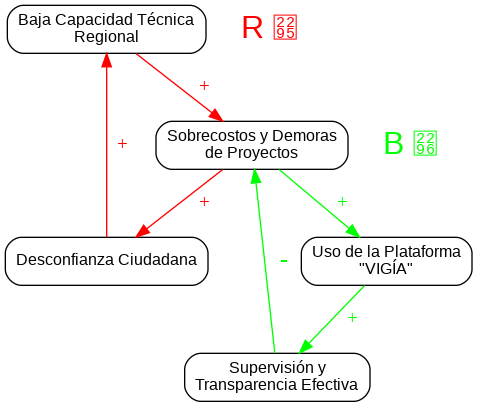

In [ ]:
# ==============================================================================
# 1. INSTALAR LA LIBRER√çA NECESARIA
# ==============================================================================
# Graphviz es la herramienta est√°ndar para crear diagramas y grafos.
!pip install graphviz -q

# ==============================================================================
# 2. C√ìDIGO PARA CREAR EL DIAGRAMA CAUSAL
# ==============================================================================
import graphviz

# Crear un nuevo "Digraph" (Grafo Dirigido)
# 'dot' es el motor que crea el diagrama.
dot = graphviz.Digraph(comment='Diagrama Causal de Ineficiencia P√∫blica')
dot.attr(rankdir='TB', size='10,6') # Organizar de arriba a abajo, tama√±o del lienzo

# --- Definici√≥n de Nodos (Las Variables del Sistema) ---
# Usamos nodos con esquinas redondeadas para un look m√°s suave.
dot.attr('node', shape='box', style='rounded', fontname='Helvetica', fontsize='12')

dot.node('CT', 'Baja Capacidad T√©cnica\nRegional')
dot.node('SD', 'Sobrecostos y Demoras\nde Proyectos')
dot.node('CC', 'Desconfianza Ciudadana')
dot.node('ST', 'Supervisi√≥n y\nTransparencia Efectiva')
dot.node('UV', 'Uso de la Plataforma\n"VIG√çA"')

# --- Definici√≥n de los Bucles ---

# BUCLE 1: El C√≠rculo Vicioso de la Ineficiencia (Reforzador - R)
dot.edge('CT', 'SD', label='  +', fontsize='14', fontcolor='red', color='red')
dot.edge('SD', 'CC', label='  +', fontsize='14', fontcolor='red', color='red')
dot.edge('CC', 'CT', label='  +', fontsize='14', fontcolor='red', color='red')

# Etiqueta para el Bucle R
dot.node('R_loop', 'R ‚äï', shape='none', fontsize='24', fontcolor='red')
dot.edge('R_loop', 'SD', style='invis') # Flecha invisible para posicionar la etiqueta


# BUCLE 2: El C√≠rculo Virtuoso de "VIG√çA" (Equilibrio - B)
dot.edge('SD', 'UV', label='  +', fontsize='14', fontcolor='green', color='green')
dot.edge('UV', 'ST', label='  +', fontsize='14', fontcolor='green', color='green')
dot.edge('ST', 'SD', label='  -', fontsize='18', fontcolor='green', color='green')

# Etiqueta para el Bucle B
dot.node('B_loop', 'B ‚äñ', shape='none', fontsize='24', fontcolor='green')
dot.edge('B_loop', 'UV', style='invis') # Flecha invisible para posicionar


# --- Generar y Mostrar la Imagen ---
# 'format='png'' crea un archivo de imagen PNG.
# 'view=False' evita que intente abrir una ventana externa.
# La imagen se guardar√° en tu entorno de Colab y se mostrar√° autom√°ticamente en la salida de la celda.
print("Generando el diagrama causal...")
dot.render('diagrama_causal_vigia', format='png', view=False)
print("¬°Diagrama generado exitosamente como 'diagrama_causal_vigia.png'!")

# Mostrar la imagen directamente en Colab
from IPython.display import Image
Image('diagrama_causal_vigia.png')